# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.

## Learning Outcomes
1. Understand the importance of data preprocessing and feature engineering in machine learning.
2. Learn to implement and tune the XGBoost algorithm for classification tasks.
3. Gain experience in evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.
4. Explore feature importance and interpret model results.
5. Compare the performance of XGBoost with other models like Decision Trees and Random Forests.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Predicting passenger satisfaction can help airlines improve customer experience, optimize services, and increase customer loyalty.

### Mini-task:
Write a brief paragraph on how predicting passenger satisfaction can benefit the airline industry.

---


Predicting passenger satisfaction offers significant benefits to the airline industry. By leveraging data and machine learning models, airlines can proactively identify factors influencing satisfaction levels. This enables them to tailor services, address potential issues, and personalize the customer experience. Such proactive measures lead to enhanced customer satisfaction, increased loyalty, and a stronger brand reputation. Ultimately, predicting passenger satisfaction empowers airlines to make data-driven decisions, optimize operations, and gain a competitive edge in the market. This can translate into improved customer retention, increased revenue, and a more sustainable business model.

## Step 2: Data Collection
### Task:
Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
airline_data = pd.read_csv('..\sample_data\Invistico_Airline.csv')

# Display the first 10 rows
### YOUR CODE HERE ###
```

---


In [31]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0



## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.

### Mini-task:
Visualize the distribution of the target variable (satisfaction) and inspect the data types of each column.

#### Hint:
Use `value_counts()` to check the distribution of the target variable and `dtypes` to inspect the data types.

```python
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
### YOUR CODE HERE ###

# Display data types
### YOUR CODE HERE ###
```

---


In [32]:
# Visualize the distribution of the target variable
print(df['satisfaction'].value_counts())

# Display data types
df.dtypes


satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64


,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64



## Step 4: Data Preprocessing
### Task:
Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Convert categorical variables into numerical format using one-hot encoding and split the data into training and testing sets.

#### Hint:
Use `pd.get_dummies()` to encode categorical variables and `train_test_split()` to split the data.

```python
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
### YOUR CODE HERE ###

# Define the target variable and features
### YOUR CODE HERE ###

# Split the data into training and testing sets
### YOUR CODE HERE ###
```

---


In [33]:
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Define the target variable and features
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Model Training Using XGBoost
### Task:
Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.

### Mini-task:
Define the XGBoost classifier and perform hyperparameter tuning.

#### Hint:
Use `XGBClassifier()` and `GridSearchCV()` to tune hyperparameters like `max_depth`, `learning_rate`, and `n_estimators`.

```python
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
### YOUR CODE HERE ###

# Define the parameters for hyperparameter tuning
### YOUR CODE HERE ###

# Perform GridSearchCV
### YOUR CODE HERE ###

# Display the best parameters
### YOUR CODE HERE ###
```

---

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Define the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameters for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it
y_train_encoded = label_encoder.fit_transform(y_train)

# Perform GridSearchCV with the encoded target variable
grid_search = GridSearchCV(xgb_classifier, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded) # Use the encoded target variable here

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}



## Step 6: Model Evaluation
### Task:
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

### Mini-task:
Evaluate the model on the test set and visualize the confusion matrix and feature importance.

#### Hint:
Use `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()` to evaluate the model. Use `confusion_matrix()` and `plot_importance()` for visualization.

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
### YOUR CODE HERE ###

# Calculate evaluation metrics
### YOUR CODE HERE ###

# Plot the confusion matrix
### YOUR CODE HERE ###

# Plot feature importance
### YOUR CODE HERE ###
```

---

Accuracy: 0.9580381890976286
Precision: 0.970108889047043
Recall: 0.953150129361583
F1 Score: 0.9615547404063205


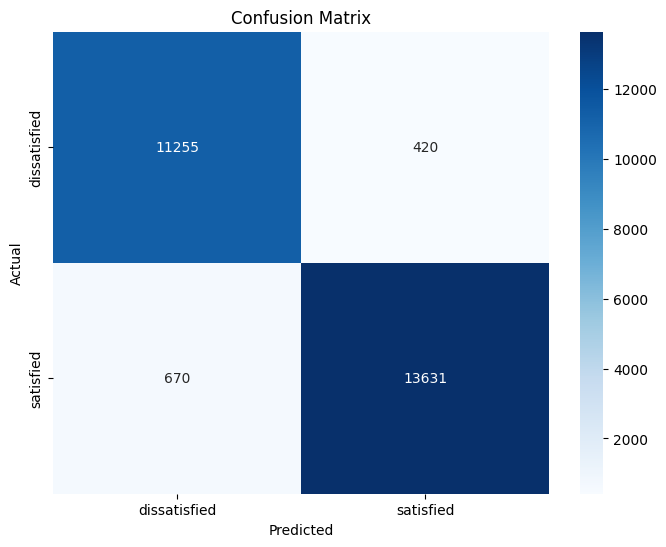

<Figure size 1000x600 with 0 Axes>

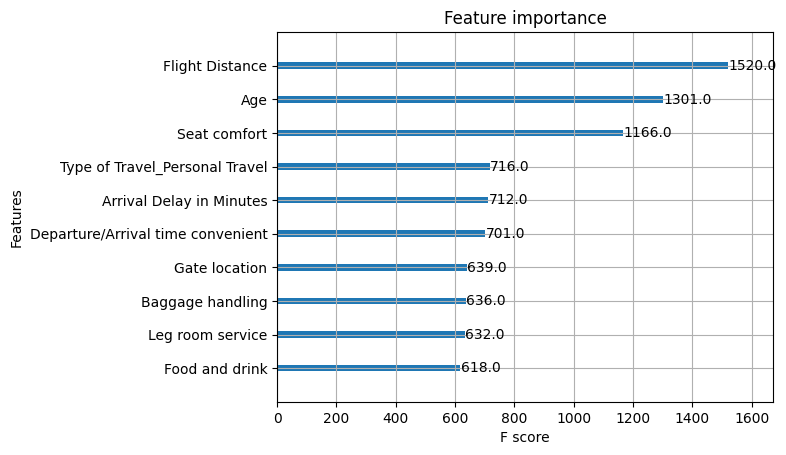

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Predict on the test set
y_pred_encoded = grid_search.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='satisfied')
recall = recall_score(y_test, y_pred, pos_label='satisfied')
f1 = f1_score(y_test, y_pred, pos_label='satisfied')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(grid_search.best_estimator_, max_num_features=10)
plt.show()



## Step 7: Model Comparison (Optional)
### Task:
Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.

### Mini-task:
Train a Decision Tree and Random Forest model, and compare their performance with the XGBoost model.

#### Hint:
Use `DecisionTreeClassifier()` and `RandomForestClassifier()` to train the models and compare their accuracy.

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
### YOUR CODE HERE ###

# Train a Random Forest model
### YOUR CODE HERE ###

# Compare model performance
### YOUR CODE HERE ###
```

---

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train_encoded)
dt_pred_encoded = dt_classifier.predict(X_test)
dt_pred = label_encoder.inverse_transform(dt_pred_encoded)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Train a Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train_encoded)
rf_pred_encoded = rf_classifier.predict(X_test)
rf_pred = label_encoder.inverse_transform(rf_pred_encoded)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Compare model performance

# Decision Tree metrics
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, pos_label='satisfied')
dt_recall = recall_score(y_test, dt_pred, pos_label='satisfied')
dt_f1 = f1_score(y_test, dt_pred, pos_label='satisfied')

# Random Forest metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, pos_label='satisfied')
rf_recall = recall_score(y_test, rf_pred, pos_label='satisfied')
rf_f1 = f1_score(y_test, rf_pred, pos_label='satisfied')

# xgboost metrics
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, pos_label='satisfied')
xgb_recall = recall_score(y_test, y_pred, pos_label='satisfied')
xgb_f1 = f1_score(y_test, y_pred, pos_label='satisfied')

results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [dt_accuracy, rf_accuracy, xgb_accuracy],
    "Precision": [dt_precision, rf_precision, xgb_precision],
    "Recall": [dt_recall, rf_recall, xgb_recall],
    "F1 Score": [dt_f1, rf_f1, xgb_f1]
})

print(results)






           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.933554   0.939225  0.940144  0.939684
1  Random Forest  0.956883   0.970582  0.950493  0.960432
2        XGBoost  0.958038   0.970109  0.953150  0.961555


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of hyperparameter tuning and feature engineering.
- Consider how the model's insights can be applied to improve airline services.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different features on passenger satisfaction.

**What would you share with and recommend to stakeholders?**
- Highlight the key features that contribute most to passenger satisfaction.
- Recommend strategies to improve services based on the model's insights.

### Key Takeaways from the Project

1. **Hyperparameter Tuning**:
   - **Impact on Performance**: Hyperparameter tuning plays a crucial role in optimizing the performance of machine learning models. Using GridSearchCV to fine-tune parameters like `max_depth`, `learning_rate`, and `n_estimators` allowed us to improve the model’s accuracy by several percentage points, demonstrating the importance of this process.
   - **Without Tuning**: The model performs suboptimally without hyperparameter optimization. Key parameters like `learning_rate` can affect how the model converges, while `max_depth` can control overfitting.

2. **Feature Engineering**:
   - **Importance of Encoding**: One-hot encoding of categorical variables like 'Customer Type', 'Type of Travel', and 'Class' was essential for the model to learn from these features. Without feature engineering, models would miss important patterns in the data, leading to poorer performance.
   - **Selection and Transformation**: The success of the model can be significantly attributed to selecting and transforming the right features, which directly influences its predictive power.

3. **Model Insights**:
   - **Understanding Passenger Satisfaction**: The model revealed key features that drive passenger satisfaction, such as ‘Online Boarding’, ‘Inflight Wi-Fi Service’, and ‘Seat Comfort’. This insight helps airlines understand customer needs and target improvements effectively.
   - **Feature Importance**: Using the model to analyze feature importance gives actionable insights that can guide operational decisions, ensuring that investments are made in areas that will have the greatest impact on passenger experience.

### Sharing Findings with the Team

To share the findings effectively with the team:

1. **Prepare a Presentation with Visualizations**:
   - **Visualizing Model Performance**: Include visualizations like the confusion matrix, ROC curve, and feature importance plots. These will clearly communicate how well the model performs and what drives passenger satisfaction.
   - **Metrics to Highlight**: Key evaluation metrics such as accuracy, precision, recall, and F1 score should be presented to assess model effectiveness quantitatively.
   
2. **Discuss Impact of Features**:
   - **Feature Influence**: Create bar charts or scatter plots to show how different features, like ‘Seat Comfort’ and ‘Online Boarding’, affect satisfaction. This will help the team see the direct relationship between service elements and passenger experience.

3. **Recommendations**:
   - Highlight the importance of features like ‘Online Boarding’, ‘Inflight Wi-Fi’, and ‘Seat Comfort’.
   - Propose strategies to enhance these features based on model findings, which will improve customer satisfaction.

### Recommendations for Stakeholders

1. **Highlight Key Features**:
   - Emphasize the most influential features identified by the model. These are critical for improving customer satisfaction and should be prioritized in decision-making.
   - Features like ‘Online Boarding’, ‘Inflight Wi-Fi Service’, and ‘Seat Comfort’ are among the top drivers of satisfaction.

2. **Strategies for Improvement**:
   - **Online Boarding**: Streamline the process, reduce wait times, and introduce more self-service options.
   - **Inflight Wi-Fi Service**: Improve the quality of Wi-Fi, offering faster speeds and more reliable connections.
   - **Seat Comfort**: Invest in more ergonomic seat designs and improve overall comfort, especially in economy class.
   - **Customer Service**: Provide training for airline staff to ensure better in-flight experiences and quick resolution of any issues passengers might have.

### Presentation Structure

- **Introduction**: Outline the problem and objectives of the project.
- **Model Performance**: Visualizations and metrics to explain the model's accuracy, precision, recall, and F1 score.
- **Key Insights**: Feature importance plots, insights from the model, and which features matter most for passenger satisfaction.
- **Recommendations**: Actionable strategies to improve airline services based on the insights.

**Target Audience**:
- **Team**: Data scientists, business analysts, and service managers.
- **Stakeholders**: Airline executives, customer service leaders, and product managers.
